dataset - https://www.kaggle.com/datasets/nehalbirla/vehicle-dataset-from-cardekho

Reference Learning - https://www.youtube.com/watch?v=p_tpQSY1aTs

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import pickle

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn import metrics

In [2]:
df = pd.read_csv('/Users/shanm/OneDrive/Desktop/E2E/2_car_price_prediction/car data.csv')

In [3]:
df.head() # Selling price is the depedeant feature or target variable

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [4]:
df.shape

(301, 9)

(301, 9)

In [5]:
# Deriving Value Count for each

In [6]:
print(df.Car_Name.value_counts())

Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64
Car_Name
city                        26
corolla altis               16
verna                       14
fortuner                    11
brio                        10
                            ..
Honda CB Trigger             1
Yamaha FZ S                  1
Bajaj Pulsar 135 LS          1
Activa 4g                    1
Bajaj Avenger Street 220     1
Name: count, Length: 98, dtype: int64


In [7]:
print(df.Year.value_counts())

Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64
Year
2015    61
2016    50
2014    38
2017    35
2013    33
2012    23
2011    19
2010    15
2008     7
2009     6
2006     4
2005     4
2003     2
2007     2
2018     1
2004     1
Name: count, dtype: int64


In [8]:
print(df.Kms_Driven.value_counts())

Kms_Driven
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: count, Length: 206, dtype: int64
Kms_Driven
45000    9
15000    9
40000    5
35000    5
50000    5
        ..
1400     1
1200     1
4100     1
21700    1
5464     1
Name: count, Length: 206, dtype: int64


In [9]:
print(df.Fuel_Type.value_counts())

Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64
Fuel_Type
Petrol    239
Diesel     60
CNG         2
Name: count, dtype: int64


In [10]:
print(df.Seller_Type.value_counts())

Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64
Seller_Type
Dealer        195
Individual    106
Name: count, dtype: int64


In [11]:
print(df.Transmission.value_counts())

Transmission
Manual       261
Automatic     40
Name: count, dtype: int64
Transmission
Manual       261
Automatic     40
Name: count, dtype: int64


In [12]:
# Derving the Unique Values of Categorical feature

In [13]:
print(df.Fuel_Type.unique())
print(df.Seller_Type.unique())
print(df.Transmission.unique())
print(df.Owner.unique())

['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]
['Petrol' 'Diesel' 'CNG']
['Dealer' 'Individual']
['Manual' 'Automatic']
[0 1 3]


In [14]:
# Check Missing Values

In [15]:
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 n

In [17]:
df.Car_Name.isna().sum() # df.Car_Name.isnull()sum()

0

0

In [18]:
df.Year.isna().sum()

0

0

In [19]:
df.Selling_Price.isna().sum()

0

0

In [20]:
df.Present_Price.isna().sum()

0

0

In [21]:
df.Kms_Driven.isna().sum()

0

0

In [22]:
df.Seller_Type.isna().sum()

0

0

In [23]:
df.Transmission.isna().sum()

0

0

In [24]:
df.Owner.isna().sum()

0

0

In [25]:
# Check Stat

In [26]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [27]:
# Deriving new feature based on existing feature

In [28]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [29]:
final_dataset = df[['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]

In [30]:
final_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [31]:
final_dataset['Current_Year']=2020

In [32]:
final_dataset['No_of_Years'] = final_dataset['Current_Year']-final_dataset['Year'] # Substract the age from current year

In [33]:
final_dataset.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [34]:
final_dataset.drop('Year' , axis = 1 , inplace = True)

In [35]:
final_dataset.head()

,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


,Car_Name,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,No_of_Years
0,ritz,3.35,5.59,27000,Petrol,Dealer,Manual,0,2020,6
1,sx4,4.75,9.54,43000,Diesel,Dealer,Manual,0,2020,7
2,ciaz,7.25,9.85,6900,Petrol,Dealer,Manual,0,2020,3
3,wagon r,2.85,4.15,5200,Petrol,Dealer,Manual,0,2020,9
4,swift,4.60,6.87,42450,Diesel,Dealer,Manual,0,2020,6


In [36]:
final_dataset.drop(['Current_Year','Car_Name'],axis = 1 , inplace = True)

In [37]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,No_of_Years
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,6
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,7
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,3
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,9
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,6


In [38]:
# Transform the Categorial values

In [39]:
# option-1

In [40]:
#le = LabelEncoder()

In [41]:
#df.Fuel_Type   = le.fit_transform(df.Fuel_Type)
#df.Seller_Type = le.fit_transform(df.Seller_Type)
#df.Transmission= le.fit_transform(df.Transmission)

In [42]:
#df.head()

In [43]:
# Option-2

In [44]:
# PD Get dummies encoding CONVERTED into onehot encoding
final_dataset = pd.get_dummies(final_dataset,drop_first = True) # First column to be deleted

In [45]:
final_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,6,False,True,False,True
1,4.75,9.54,43000,0,7,True,False,False,True
2,7.25,9.85,6900,0,3,False,True,False,True
3,2.85,4.15,5200,0,9,False,True,False,True
4,4.60,6.87,42450,0,6,True,False,False,True


In [46]:
# Correlation Matrix

In [47]:
final_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


,Selling_Price,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
No_of_Years,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


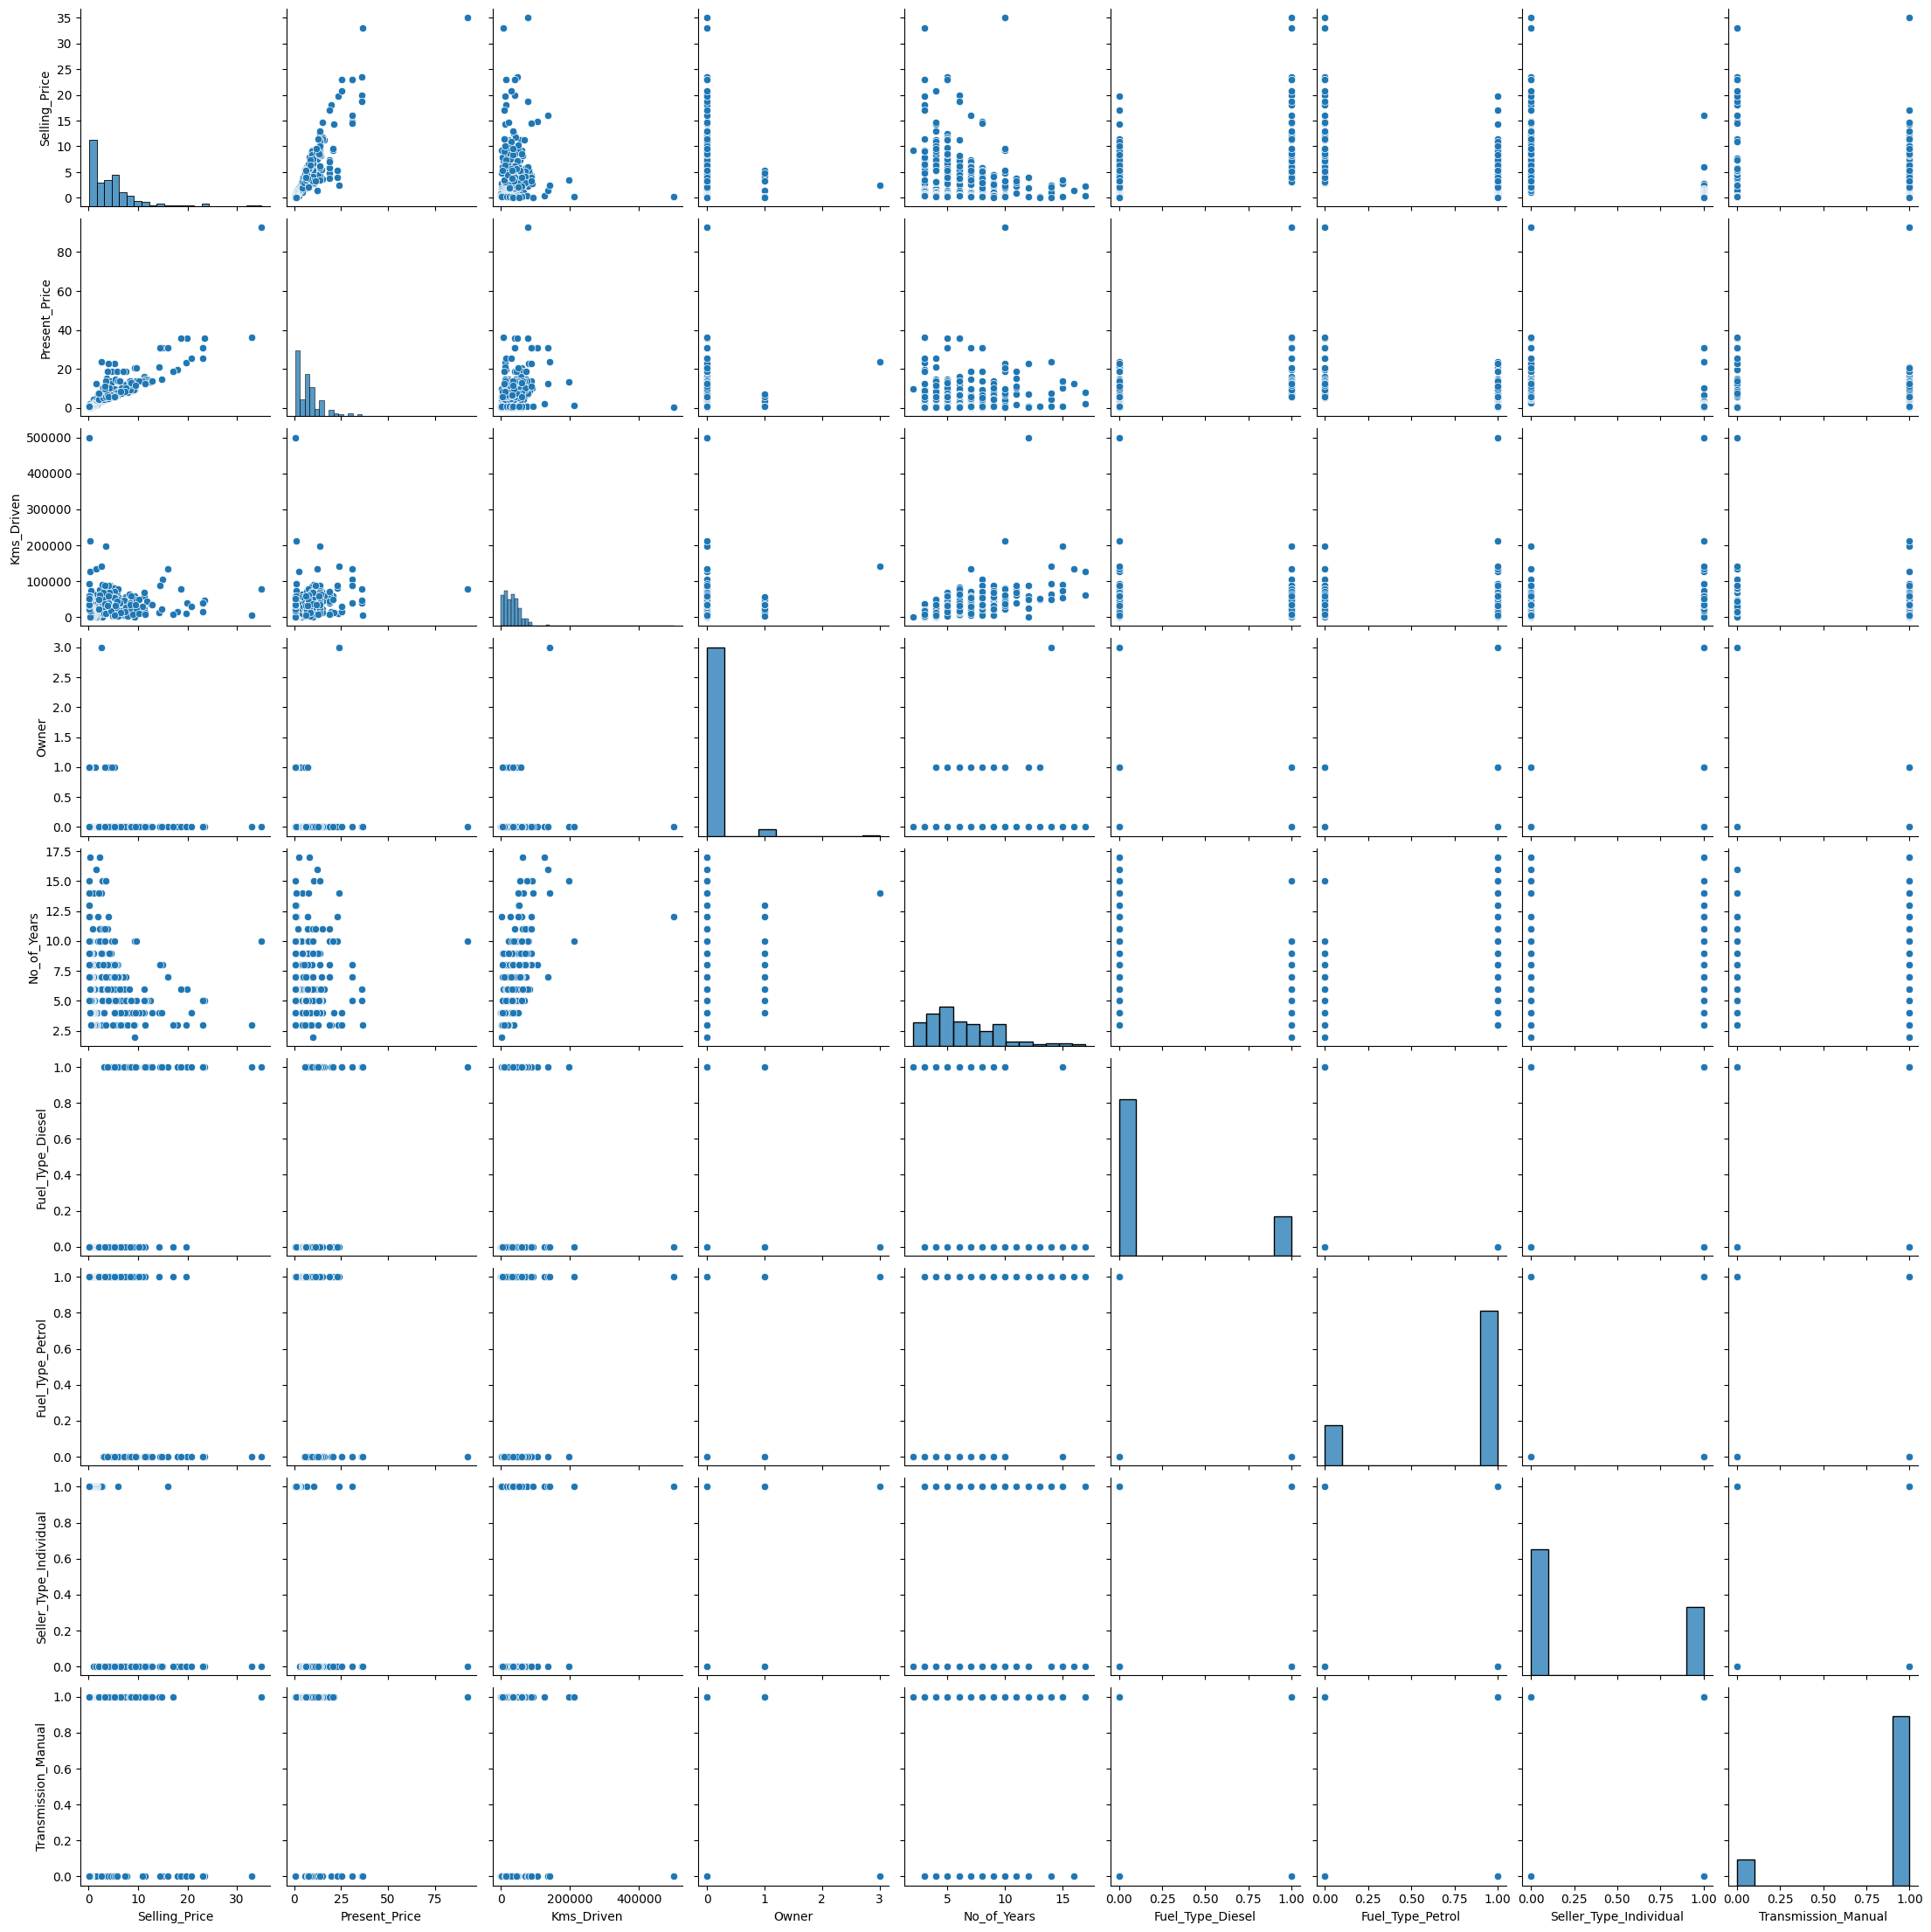

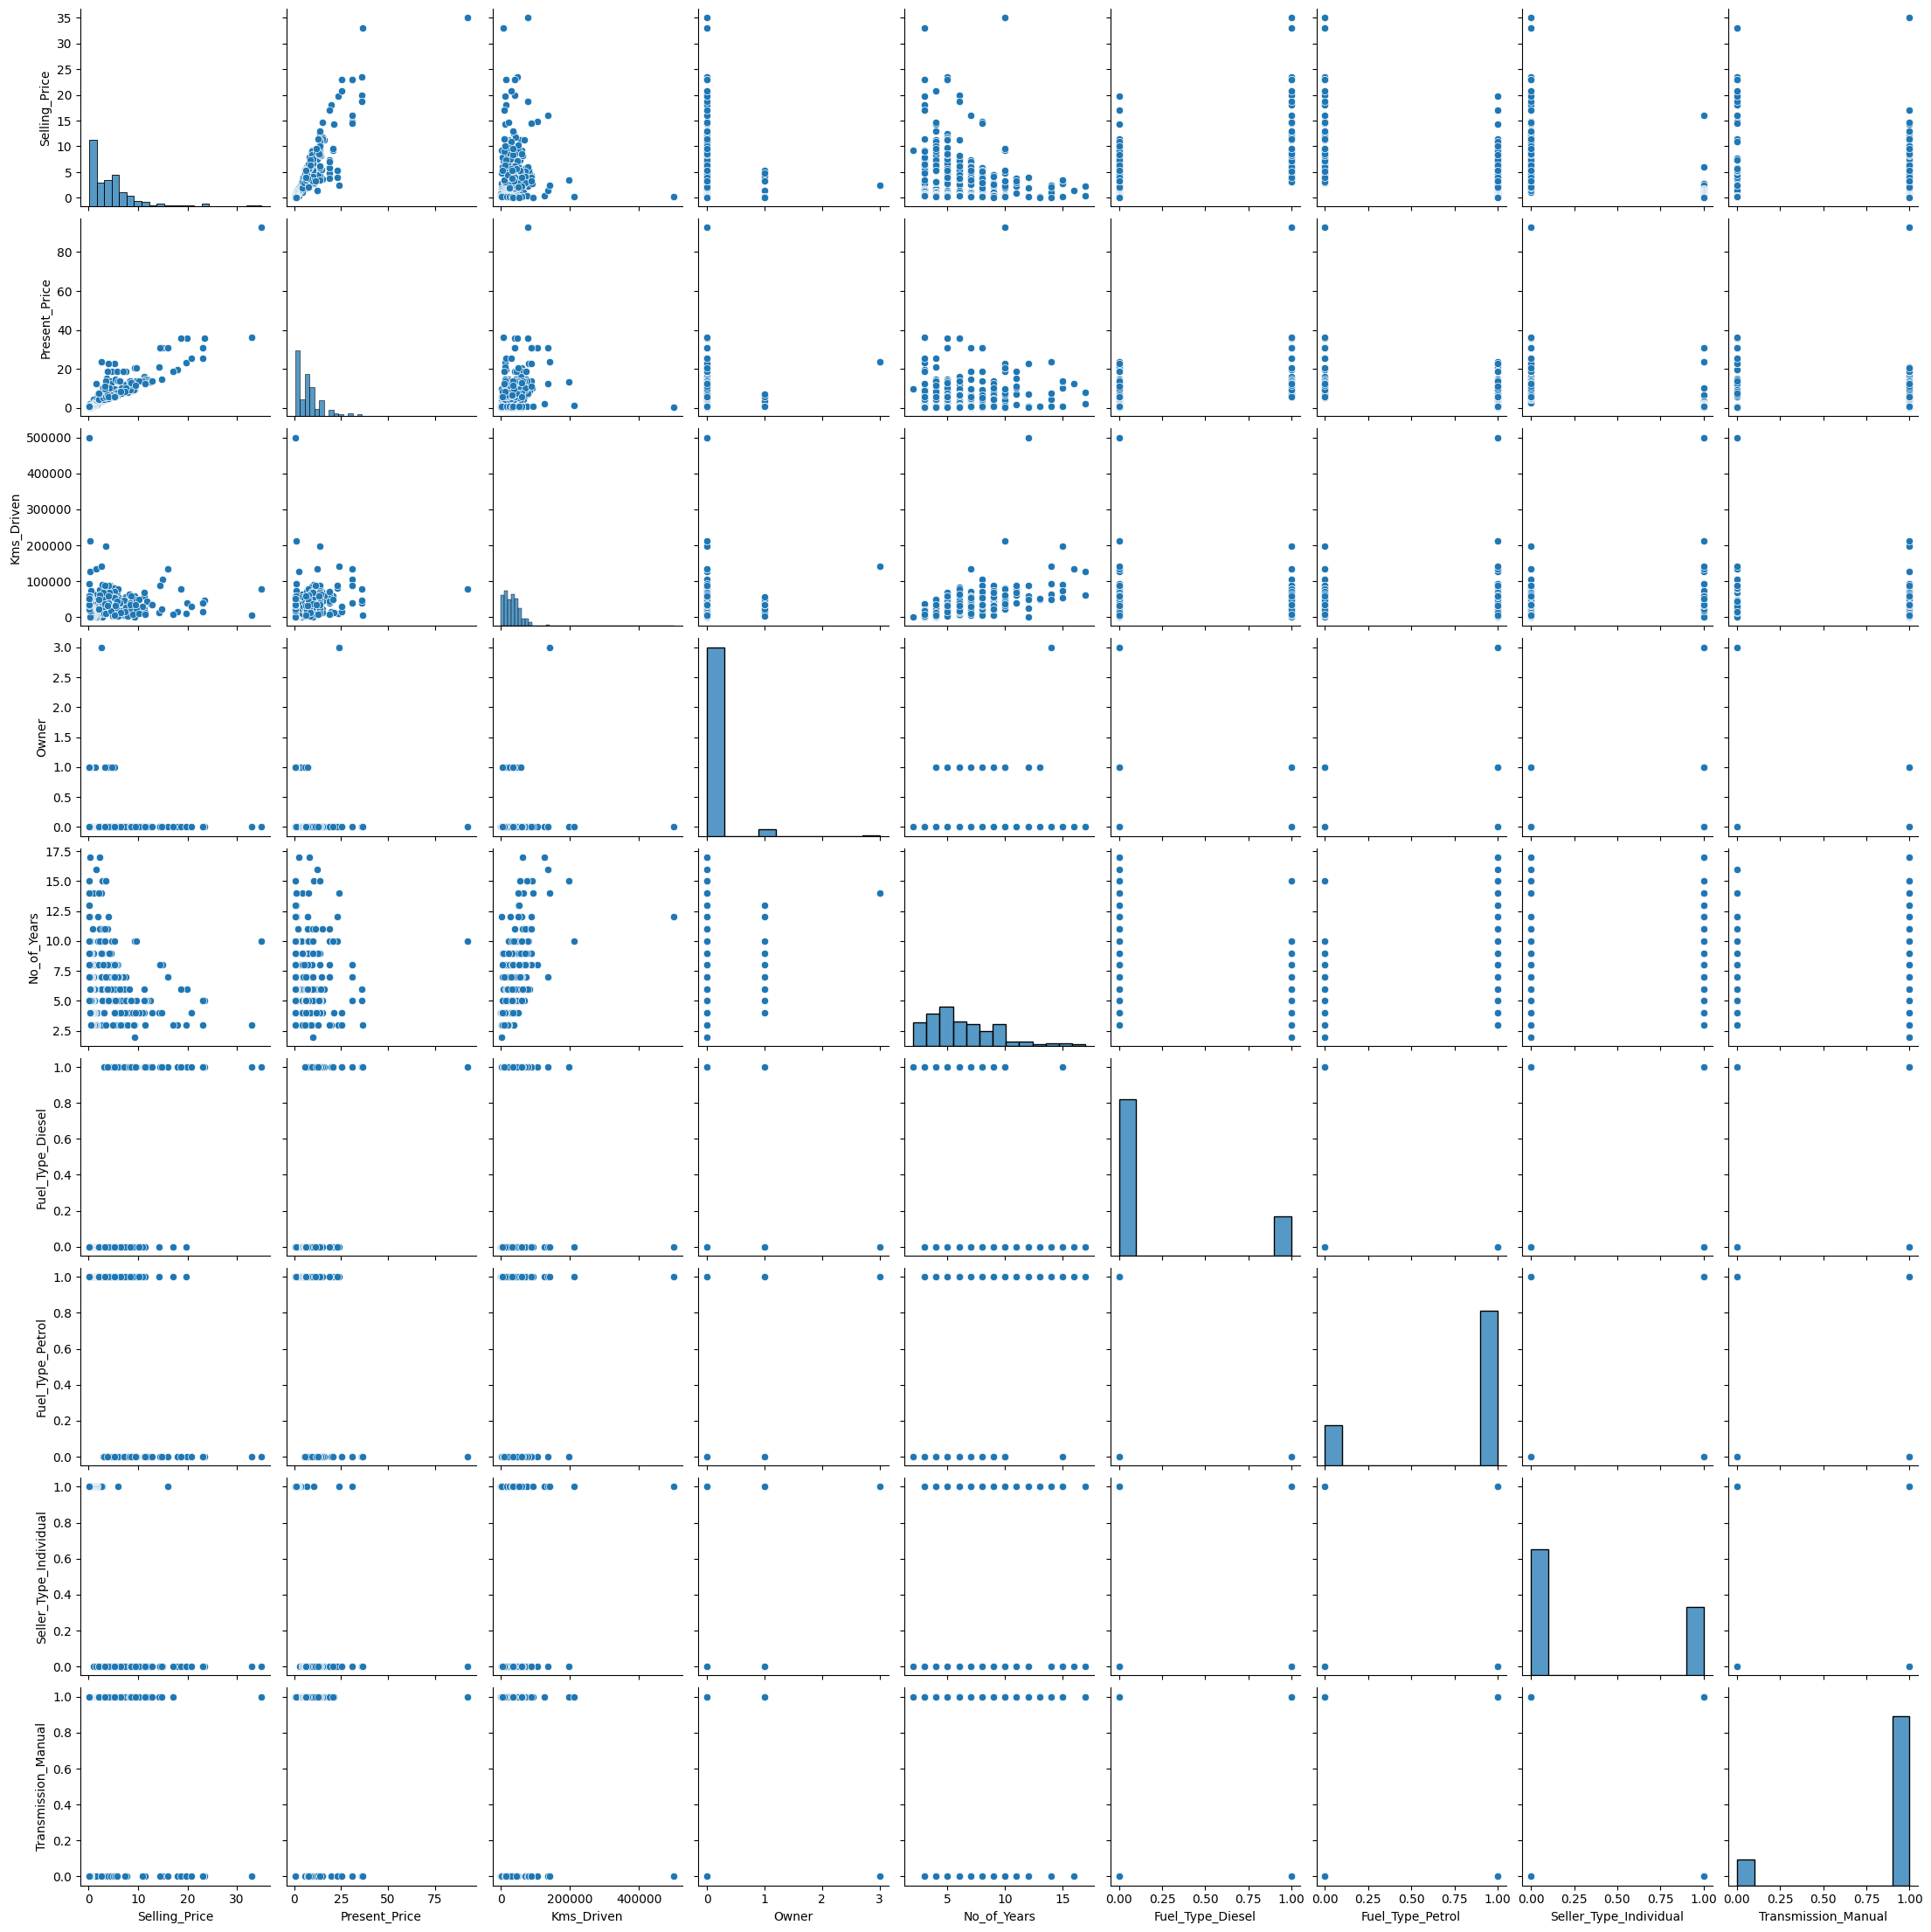

In [48]:
sns.pairplot(final_dataset);

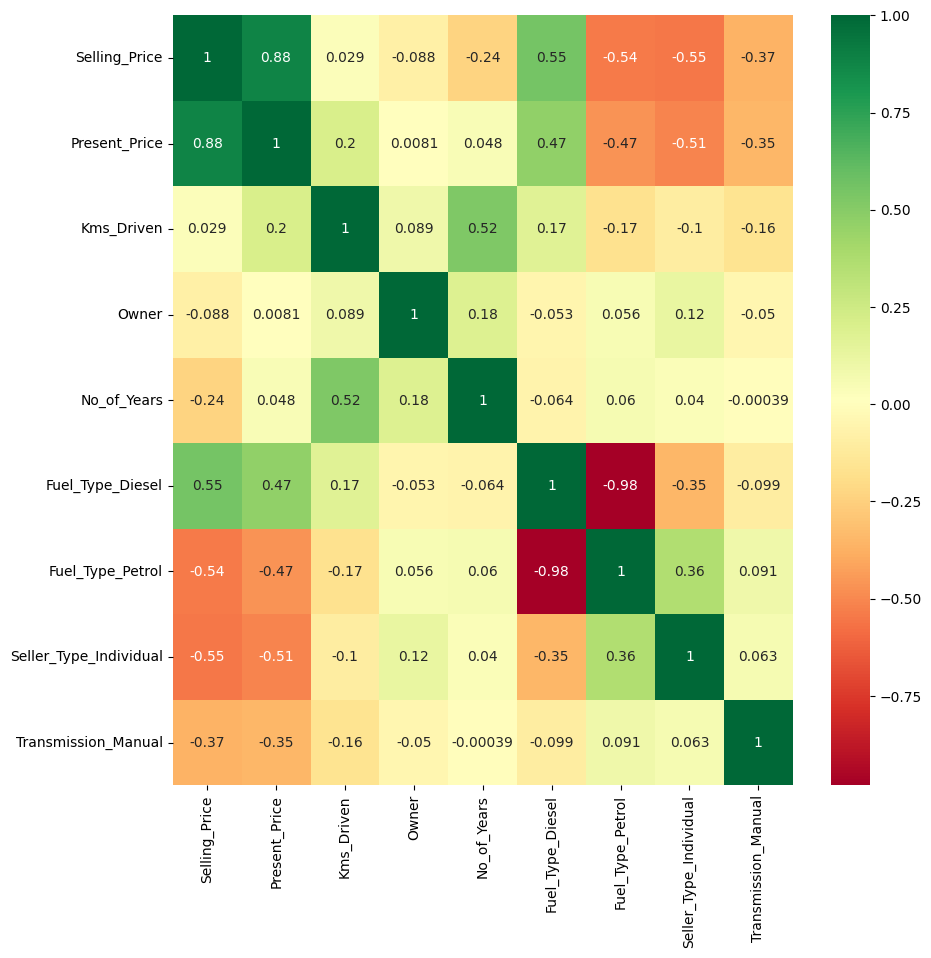

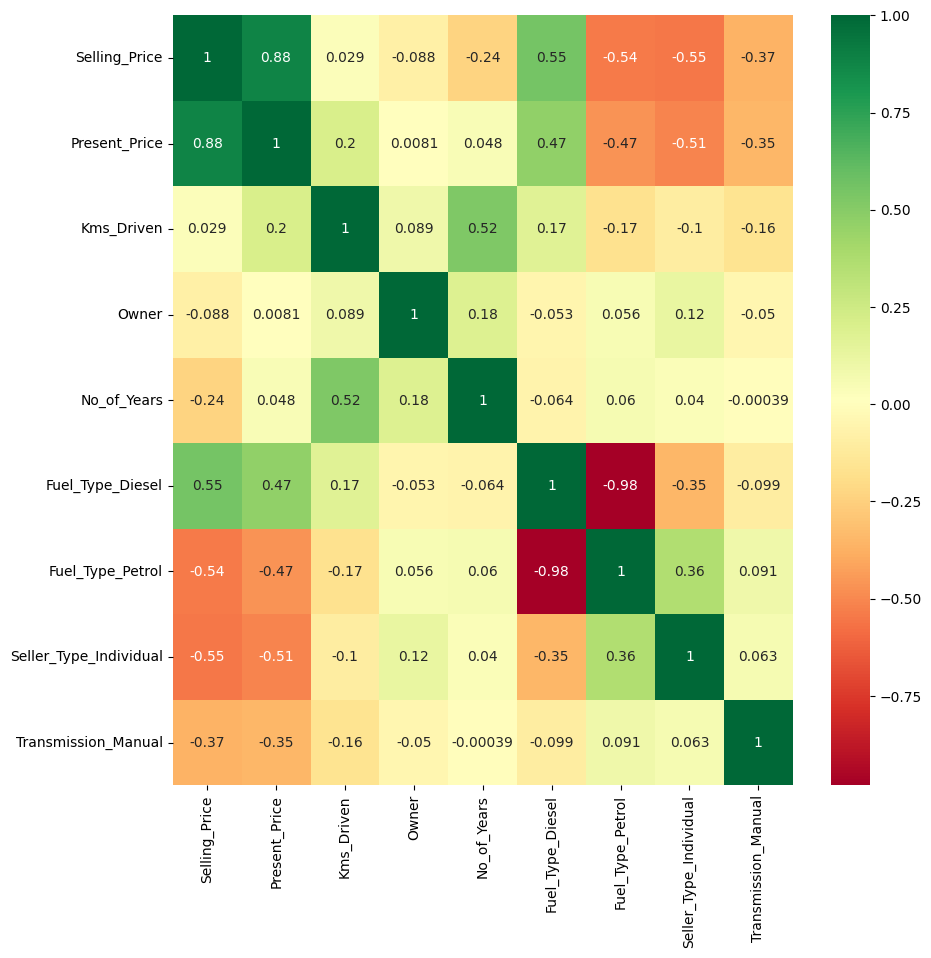

In [49]:
corrmat = final_dataset.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
g=sns.heatmap(final_dataset[top_corr_features].corr(),annot=True,cmap='RdYlGn');

# Green represents +Ve Corrleation
# Red represents -ve Correlatiion

In [50]:
#sns.heatmap(data = df.corr(),annot = True);

In [51]:
# Define X & y

In [52]:
X  = final_dataset.drop('Selling_Price',axis = 1) # or X = final_dataset.iloc[:,1:] - all rows + excluding first column(selling price)
y  = final_dataset['Selling_Price'] # y = final_dataset.iloc[:,0] - all rows + ONLY first column(selling price)

In [53]:
X.head()

,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,False,True,False,True
1,9.54,43000,0,7,True,False,False,True
2,9.85,6900,0,3,False,True,False,True
3,4.15,5200,0,9,False,True,False,True
4,6.87,42450,0,6,True,False,False,True


,Present_Price,Kms_Driven,Owner,No_of_Years,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,6,False,True,False,True
1,9.54,43000,0,7,True,False,False,True
2,9.85,6900,0,3,False,True,False,True
3,4.15,5200,0,9,False,True,False,True
4,6.87,42450,0,6,True,False,False,True


In [54]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [55]:
# Feature Importance

In [56]:
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

ExtraTreesRegressor()

In [57]:
print(model.feature_importances_)

[0.40275067 0.04150741 0.001917   0.07300284 0.20581831 0.01688856
 0.12797398 0.13014124]
[0.40275067 0.04150741 0.001917   0.07300284 0.20581831 0.01688856
 0.12797398 0.13014124]


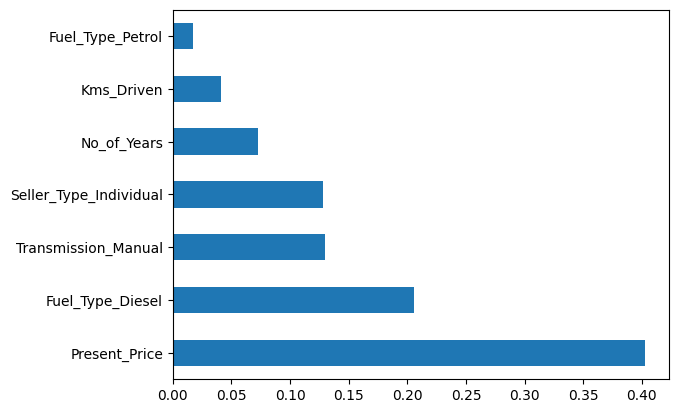

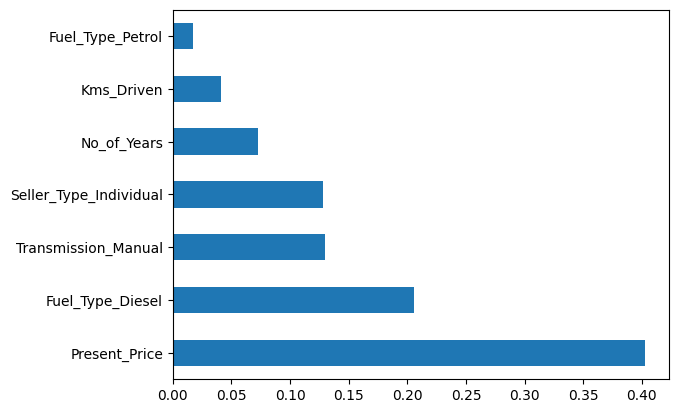

In [58]:
#Plot graph for feature importance for better visualization
feature_imp = pd.Series(model.feature_importances_,index = X.columns)
feature_imp.nlargest(7).plot(kind ='barh')
plt.show();

In [59]:
# Train test split

In [60]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2)

In [61]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((240, 8), (61, 8), (240,), (61,))

((240, 8), (61, 8), (240,), (61,))

In [62]:
# Scalar is not required as Random Forest Regressor itself will take care (Reason : Random Forest uses decision treee and in decision treen, its not required)

In [63]:
# Model Generation

In [64]:
# Example for list comprehension generation
#n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1200, num = 12)]
#print(n_estimators)

In [65]:
# n_estimators is called decisions trees (no of decision tress)

In [66]:
# Hyper parameters

In [67]:
#Randomized Search CV

In [68]:
# Number of trees in Random Forest
n_estimators = [int(x) for x in np.linspace(start = 100,
                                            stop  = 1200,
                                            num   = 12)]
print(n_estimators)

# Number of features to consider at every split
max_features = ['auto','sqrt']

# Maximum no of levels in tree
max_depth = [int(x) for x in np.linspace(start = 5,
                                         stop  = 30,
                                         num   = 6)]

# max.depth.append(None)

# Minimum number of samples required to split a node
min_samples_split = [2,5,10,15,100]

# Mininum number of samples required at each node
min_samples_leaf =[1,2,5,10]

[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]
[100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200]


In [69]:
random_grid = {'n_estimators'      : n_estimators,
               'max_features'      : max_features,
               'max_depth'         : max_depth,
               'min_samples_split' : min_samples_split,
               'min_samples_leaf'  : min_samples_leaf }
print(random_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}
{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000, 1100, 1200], 'max_features': ['auto', 'sqrt'], 'max_depth': [5, 10, 15, 20, 25, 30], 'min_samples_split': [2, 5, 10, 15, 100], 'min_samples_leaf': [1, 2, 5, 10]}


In [70]:
regmodel = RandomForestRegressor()

In [71]:
rf_random = RandomizedSearchCV(estimator = regmodel,
                         param_distributions=random_grid,
                         scoring = 'neg_mean_squared_error',
                         n_iter = 10,
                         cv = 5,
                         verbose=2,
                         random_state=42,
                         n_jobs =1)

In [72]:
rf_random.fit(X_train,y_train)
#Verbose is basically to display all the logging records here in the window

Fitting 5 folds for each of 10 candidates, totalling 50 fits
Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.3s
[CV] END max_depth=10, max_features=sqrt, min_samples_leaf=5, min_samples_split=5, n_estimators=900; total time=   2.4s
[CV] END max_depth=10, max_features=sq

[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   3.0s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.7s
[CV] END max_depth=5, max_features=sqrt, min_samples_leaf=10, min_samples_split=15, n_estimators=1100; total time=   2.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.9s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_features=sqrt, min_samples_leaf=1, min_samples_split=15, n_estimators=300; total time=   0.7s
[CV] END max_depth=15, max_fe

c:\users\shanm\onedrive\desktop\e2e\2_car_price_prediction\envs\Lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
20 fits failed out of a total of 50.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "c:\users\shanm\onedrive\desktop\e2e\2_car_price_prediction\envs\Lib\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "c:\users\shanm\onedrive\desktop\e2e\2_car_price_prediction\envs\Lib\site-packages\sklearn\base.py", line 1145, in wrapper
    estimator._validate_params()
  File "c:\users\shanm\onedrive\desktop\e2e\2_car_price_prediction\en

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

RandomizedSearchCV(cv=5, estimator=RandomForestRegressor(), n_jobs=1,
                   param_distributions={'max_depth': [5, 10, 15, 20, 25, 30],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 5, 10],
                                        'min_samples_split': [2, 5, 10, 15,
                                                              100],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000, 1100,
                                                         1200]},
                   random_state=42, scoring='neg_mean_squared_error',
                   verbose=2)

In [73]:
rf_random.best_params_

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

{'n_estimators': 1000,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 25}

In [74]:
predictions = rf_random.predict(X_test)

In [75]:
predictions

array([ 4.86395,  0.45413,  0.55274,  1.24529,  3.03646,  5.8771 ,
        1.21817,  3.39991,  0.61816,  4.93035,  7.65124, 16.08623,
        3.9391 ,  2.77918,  4.8553 ,  0.42296,  0.86221,  4.9171 ,
       20.09791,  4.97084,  5.43158,  2.74556,  1.14184,  0.63397,
        0.26949,  6.09376,  0.67446,  0.44573,  0.45458, 12.32222,
        0.57713,  0.89788,  3.26641,  4.32155,  1.13415,  3.50928,
        4.23273,  6.4988 ,  5.9474 ,  1.36834, 13.6256 ,  0.39026,
        9.05219, 18.31123,  7.18829,  8.64448,  5.58242,  0.65014,
        4.15955,  6.8755 ,  8.42459,  2.46589,  5.7393 ,  7.95738,
        6.35132,  5.50268,  0.33932,  8.42459,  0.66649,  5.4239 ,
        4.23325])

array([ 4.86395,  0.45413,  0.55274,  1.24529,  3.03646,  5.8771 ,
        1.21817,  3.39991,  0.61816,  4.93035,  7.65124, 16.08623,
        3.9391 ,  2.77918,  4.8553 ,  0.42296,  0.86221,  4.9171 ,
       20.09791,  4.97084,  5.43158,  2.74556,  1.14184,  0.63397,
        0.26949,  6.09376,  0.67446,  0.44573,  0.45458, 12.32222,
        0.57713,  0.89788,  3.26641,  4.32155,  1.13415,  3.50928,
        4.23273,  6.4988 ,  5.9474 ,  1.36834, 13.6256 ,  0.39026,
        9.05219, 18.31123,  7.18829,  8.64448,  5.58242,  0.65014,
        4.15955,  6.8755 ,  8.42459,  2.46589,  5.7393 ,  7.95738,
        6.35132,  5.50268,  0.33932,  8.42459,  0.66649,  5.4239 ,
        4.23325])

C:\Users\shanm\AppData\Local\Temp\ipykernel_14016\2522509662.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions); # Subtraction
C:\Users\shanm\AppData\Local\Temp\ipykernel_14016\2522509662.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_test - predictions); # Subtract

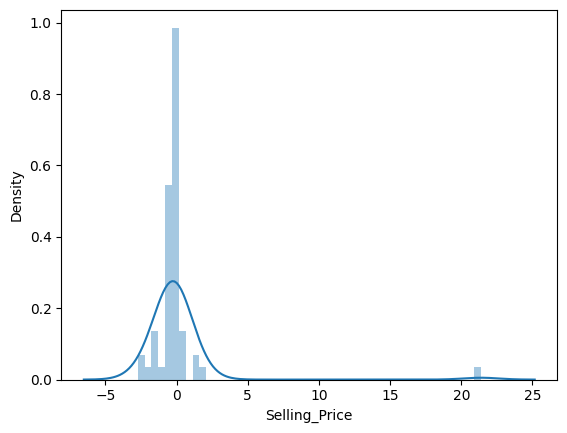

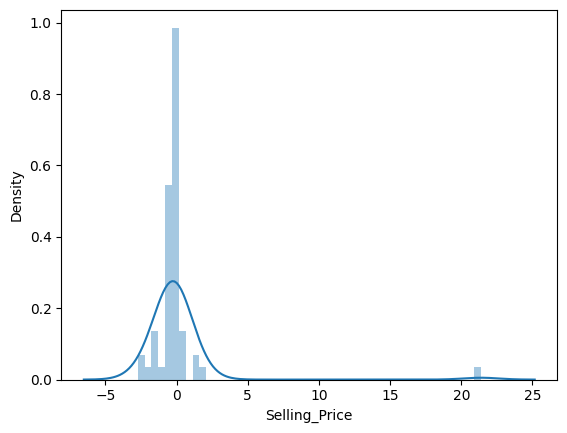

In [76]:
sns.distplot(y_test - predictions); # Subtraction

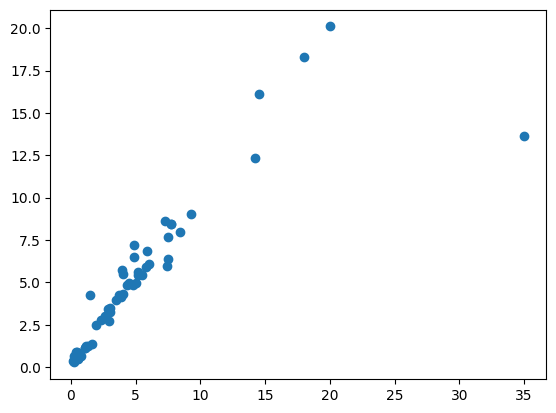

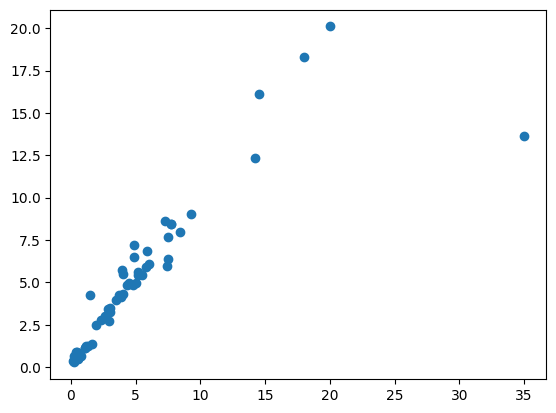

In [77]:
plt.scatter(y_test,predictions);

In [78]:
#Pickling the file

In [79]:
#Open a file where you want and store the data
file = open('random_forest_regression_model.pkl','wb')

#dum the information into the file
pickle.dump(rf_random,file)

In [80]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.8567996721311444
MSE: 8.121236309622988
RMSE: 2.8497782913102183
MAE: 0.8567996721311444
MSE: 8.121236309622988
RMSE: 2.8497782913102183
